In [1]:
import numpy as np
import pandas as pd

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
bank_df = pd.read_csv("CF_TREE_SAMPLE.csv")

In [5]:
bank_df.head(10) 

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9
1,C10,1,41,M,84370.59,SELF-EMP,14,41-45,843,9
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19
4,C10000,0,43,M,97100.48,SENP,3,41-45,397,8
5,C10001,0,30,M,160378.60,SAL,2,26-30,781,11
6,C10002,0,43,M,26275.55,PROF,23,41-45,354,12
7,C10003,0,53,M,33616.47,SAL,45,>50,239,5
8,C10004,0,45,M,1881.37,PROF,3,41-45,339,13
9,C10005,0,37,M,3274.37,PROF,33,36-40,535,9


In [6]:
bank_df.shape

(20000, 10)

In [7]:
bank_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         20000 non-null  object 
 1   Target          20000 non-null  int64  
 2   Age             20000 non-null  int64  
 3   Gender          20000 non-null  object 
 4   Balance         20000 non-null  float64
 5   Occupation      20000 non-null  object 
 6   No_OF_CR_TXNS   20000 non-null  int64  
 7   AGE_BKT         20000 non-null  object 
 8   SCR             20000 non-null  int64  
 9   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.5+ MB


In [8]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in bank_df.columns: 
    if bank_df[feature].dtype == 'object':
        bank_df[feature] = pd.Categorical(bank_df[feature]).codes 

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         20000 non-null  int16  
 1   Target          20000 non-null  int64  
 2   Age             20000 non-null  int64  
 3   Gender          20000 non-null  int8   
 4   Balance         20000 non-null  float64
 5   Occupation      20000 non-null  int8   
 6   No_OF_CR_TXNS   20000 non-null  int64  
 7   AGE_BKT         20000 non-null  int8   
 8   SCR             20000 non-null  int64  
 9   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int16(1), int64(5), int8(3)
memory usage: 1.0 MB


In [10]:
# capture the target column ("default") into separate vectors for training set and test set

X = bank_df.drop(["Target","Cust_ID"] , axis=1)

y = bank_df.pop("Target")




In [11]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


# Ensemble RandomForest Classifier

In [12]:
rfcl = RandomForestClassifier(n_estimators = 501,oob_score=True)
rfcl = rfcl.fit(X_train, train_labels)

In [16]:
rfcl.oob_score_

0.9190714285714285

In [14]:
accuracy_score(train_labels,rfcl.predict(X_train))

1.0

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [13]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [14]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 501}

In [17]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=501)

In [16]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
confusion_matrix(train_labels,ytrain_predict)

array([[12751,    31],
       [ 1148,    70]])

In [19]:
confusion_matrix(test_labels,ytest_predict)

array([[5474,   11],
       [ 488,   27]])

In [20]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12782
           1       0.69      0.06      0.11      1218

    accuracy                           0.92     14000
   macro avg       0.81      0.53      0.53     14000
weighted avg       0.90      0.92      0.88     14000



In [21]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5485
           1       0.71      0.05      0.10       515

    accuracy                           0.92      6000
   macro avg       0.81      0.53      0.53      6000
weighted avg       0.90      0.92      0.88      6000



In [24]:
import matplotlib.pyplot as plt

AUC: 0.844


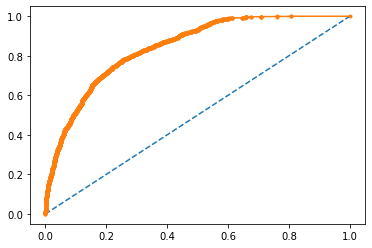

In [23]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.777


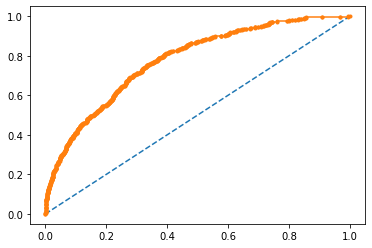

In [24]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()